# MALIGNANT COMMENTS CLASSIFIER

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Train Dataset
train_mc = pd.read_csv("train.csv") # Reading csv file
train_mc

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
# Test Dataset
test_mc = pd.read_csv("test.csv") # Reading csv file
test_mc

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


The train dataset is comprised of both dependent variable (target) and independent variables. In train dataset the label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. Since the target variable is consists of 2 classes 0 and 1 which can be termed as categorical in nature which makes this to be a "Classification Problem".

The test dataset contains only independent variables.

Feature Information: Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. Highly Malignant: It denotes comments that are highly malignant and hurtful. Rude: It denotes comments that are very rude and offensive. Threat: It contains indication of the comments that are giving any threat to someone. Abuse: It is for comments that are abusive in nature. Loathe: It describes the comments which are hateful and loathing in nature. ID: It includes unique Ids associated with each comment text given. Comment text: This column contains the comments extracted from various social media platforms.

In [6]:
# First 10 rows
train_mc.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
#last 10 rows
train_mc.tail(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
#sample
train_mc.sample(4)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
94354,fc5543da8c0e0e16,Attempt of translation of (French) Magneto-Exp...,0,0,0,0,0,0
15023,27b66577568ee293,"Yes, I believe I've already said that the poin...",0,0,0,0,0,0
145765,21e47b0616c0d105,"Sources?\n\nYou'll have to forgive me, I've ne...",0,0,0,0,0,0
62953,a86bd71e7b96aba9,I'm saying that for you to see conflict of int...,0,0,0,0,0,0


# EXPLORATORY DATA ANALYSIS(EDA)

In [9]:
# Checking shape of train dataset
train_mc.shape

(159571, 8)

In [10]:
# Checking shape of test dataset
test_mc.shape

(153164, 2)

In [11]:
# Checking all column names (TRAIN)
train_mc.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [12]:
# Checking all column names (TEST)
test_mc.columns

Index(['id', 'comment_text'], dtype='object')

In [13]:
# Checking the data types of all columns (TRAIN)
train_mc.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [14]:
# Checking the info of the train dataset
train_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [15]:
# Checking the info of the test dataset
test_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [16]:
# Checking for null values
print("Null values in train dataset: \n", train_mc.isnull().sum())
print("\nNull values in test dataset: \n", test_mc.isnull().sum())

Null values in train dataset: 
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Null values in test dataset: 
 id              0
comment_text    0
dtype: int64


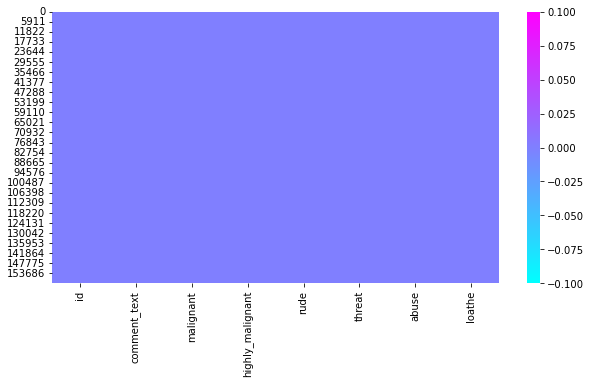

In [17]:
# Visualizing the null values clearly in train dataset using heat map
plt.figure(figsize=(10,5))
sns.heatmap(train_mc.isnull(), cmap="cool")
plt.show()

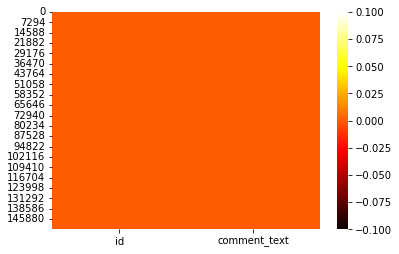

In [18]:
# Visualizing the null values clearly in test dataset using heat map
sns.heatmap(test_mc.isnull(), cmap="hot")
plt.show()

In [19]:
# Checking for duplicate values if there are any
print("Duplicate entries in the train dataset:", train_mc.duplicated().sum())
print("Duplicate entries in the test dataset:", test_mc.duplicated().sum())

Duplicate entries in the train dataset: 0
Duplicate entries in the test dataset: 0


In [20]:
# Checking the number of unique values in each column of dataset
train_mc.nunique().to_frame("No of Unique Values")

,No of Unique Values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


In [21]:
# Dropping id column 
train_mc.drop(["id"],axis=1,inplace = True)

In [22]:
# Checking value counts for each feature
columns=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
for col in columns:
    print("Value Counts of {} :".format(col, train_mc[col].nunique()))
    print(train_mc[f'{col}'].value_counts())
    print('-'*40)

Value Counts of malignant :
0    144277
1     15294
Name: malignant, dtype: int64
----------------------------------------
Value Counts of highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64
----------------------------------------
Value Counts of rude :
0    151122
1      8449
Name: rude, dtype: int64
----------------------------------------
Value Counts of threat :
0    159093
1       478
Name: threat, dtype: int64
----------------------------------------
Value Counts of abuse :
0    151694
1      7877
Name: abuse, dtype: int64
----------------------------------------
Value Counts of loathe :
0    158166
1      1405
Name: loathe, dtype: int64
----------------------------------------


In [23]:
# Checking the statistical summary of the train dataset
train_mc.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Let's see how the comments look like in train dataset
train_mc['comment_text'].value_counts()

Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [25]:
# Checking the percentage of good and bad comments from all features combiningly in dataset 
good_comments = train_mc[(train_mc['malignant']!=1) & (train_mc['highly_malignant']!=1) & (train_mc['rude']!=1) & 
                            (train_mc['threat']!=1) & (train_mc['abuse']!=1) & (train_mc['loathe']!=1)]
percent=len(good_comments)/len(train_mc)*100
print('Percentage of positive comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of positive comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


In [26]:
# Checking the percentage of comments that are toxic compared to normal comments
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(col, train_mc[col].value_counts(normalize=True)*100))
    print(train_mc[f'{col}'].value_counts(normalize=True)*100)
    print('-'*50)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in abuse :
0    95.063639
1     4.936361
Name: abuse, dtype: float64
--------------------------------------------------
Percentage of toxic comments compared to normal comments in loathe :
0    99.119514
1

# FEATURE ENGINEERING

We shall create a new column "label" which is the sum of all the target features.

In [27]:
# Creating a new feature having negative and non negative comments for the particular comment.
colmn = ['malignant','highly_malignant','rude','threat','abuse','loathe']
train_mc[colmn].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [28]:
# Label column is the sum of all the target features
train_mc['label'] = train_mc[colmn].sum(axis=1)
train_mc.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [29]:
train_mc.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [30]:
# Scaling the label column i.e. converting it from multiple labels into binary
train_mc['label'] = train_mc['label'] > 0
train_mc['label'] = train_mc['label'].astype(int)
train_mc.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [31]:
# Checking value counts for label after scaling
train_mc.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [32]:
# Creating new column for length of comments
train_mc['comment_length']=train_mc.comment_text.str.len()
train_mc

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [33]:
# Adding new column comment_length to check length of comment_text characters in test data
test_mc['comment_length']=test_mc.comment_text.str.len()
test_mc

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Univariate analysis

In [34]:
# Storing the number of counts for every target label
counts=train_mc.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62893130
dtype: int64

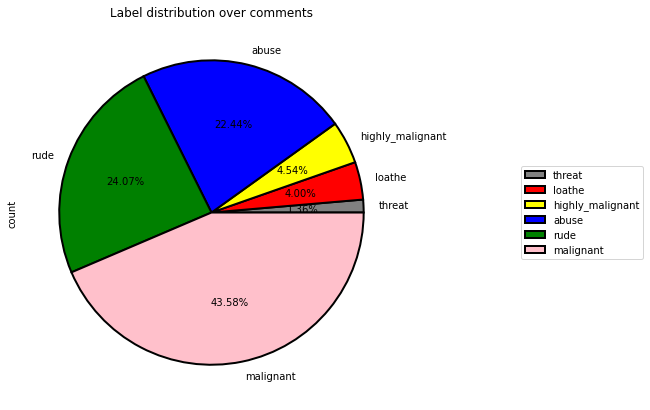

In [35]:
# Label distribution comments using pie chart
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
colors = ["grey", "red","yellow","blue","green","pink"]

x = train_mc[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y = 'count', title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':2, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

0    143346
1     16225
Name: label, dtype: int64


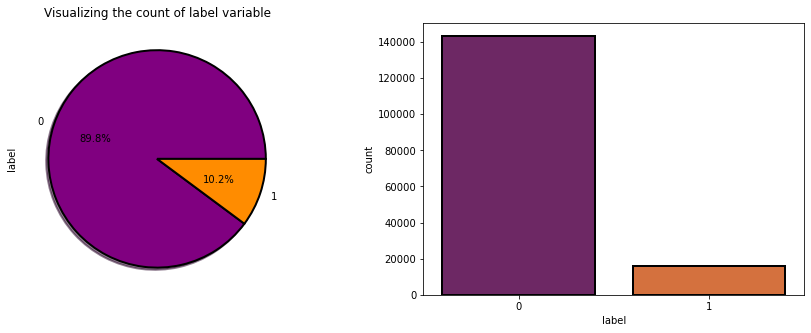

In [36]:
# Visualizing count of negative and non negative comments combining 
print(train_mc['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["purple", "darkorange"]
train_mc['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=train_mc, ax=ax[1],palette="inferno",linewidth=2, edgecolor="k")
plt.show()

0    144277
1     15294
Name: malignant, dtype: int64


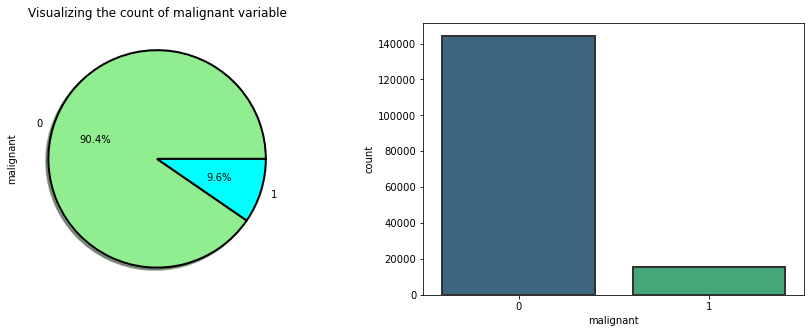

In [37]:
# Visualizing count of malignant and non malignant comments
print(train_mc['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lightgreen", "cyan"]
train_mc['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=train_mc, ax=ax[1],palette="viridis",linewidth=2, edgecolor=".2")
plt.show()

0    157976
1      1595
Name: highly_malignant, dtype: int64


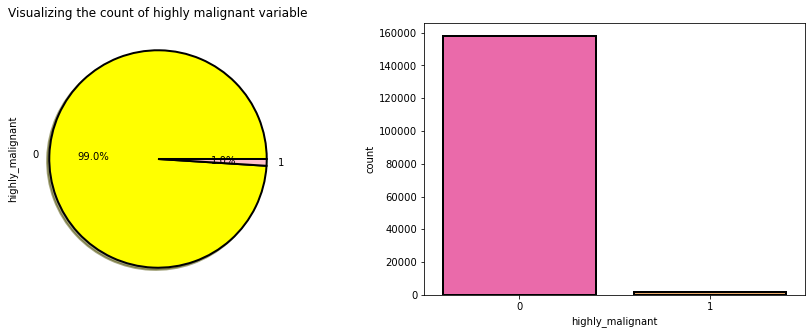

In [38]:
# Visualizing count of highly malignant and normal comments
print(train_mc['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellow", "pink"]
train_mc['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=train_mc, ax=ax[1],palette="spring",linewidth=2, edgecolor="k")
plt.show()

0    151122
1      8449
Name: rude, dtype: int64


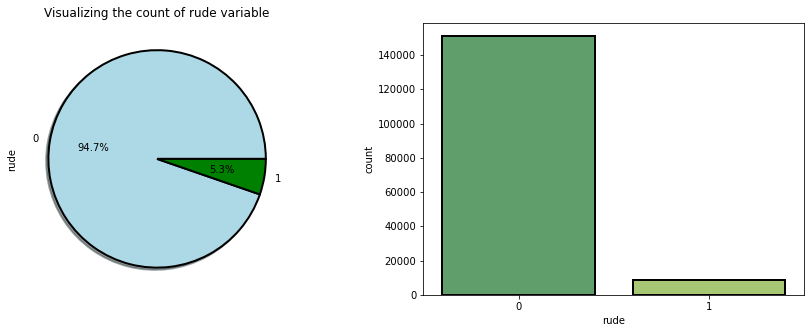

In [39]:
# Visualizing count of rude and normal comments
print(train_mc['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lightblue", "green"]
train_mc['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=train_mc, ax=ax[1],palette="summer",linewidth=2, edgecolor="k")
plt.show()

0    159093
1       478
Name: threat, dtype: int64


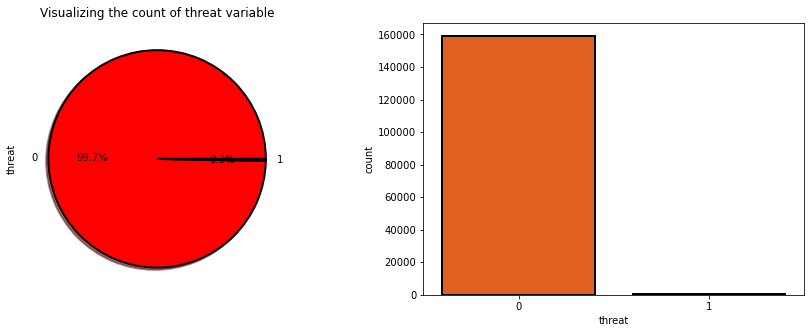

In [40]:
# Visualizing count of threat and normal comments
print(train_mc['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["red", "yellow"]
train_mc['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2, 'edgecolor':'k'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=train_mc, ax=ax[1],palette="autumn",linewidth=2, edgecolor="k")
plt.show()

0    159093
1       478
Name: threat, dtype: int64


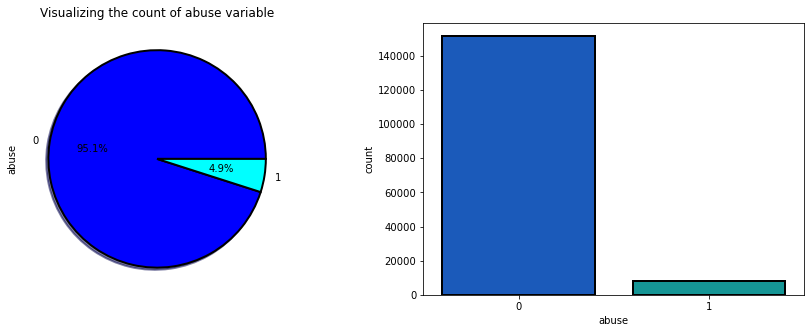

In [41]:
# Visualizing count of abuse and normal comments
print(train_mc['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["blue", "cyan"]
train_mc['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=train_mc, ax=ax[1],palette="winter",linewidth=2, edgecolor="k")
plt.show()

0    158166
1      1405
Name: loathe, dtype: int64


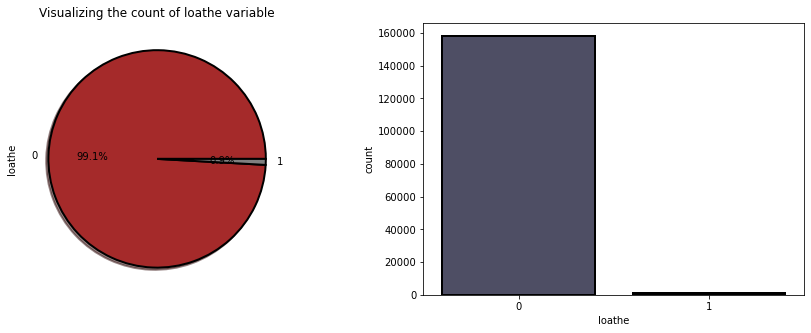

In [42]:
# Visualizing count of loathe and normal comments
print(train_mc['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["brown", "grey"]
train_mc['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=train_mc, ax=ax[1],palette="bone",linewidth=2, edgecolor="k")
plt.show()

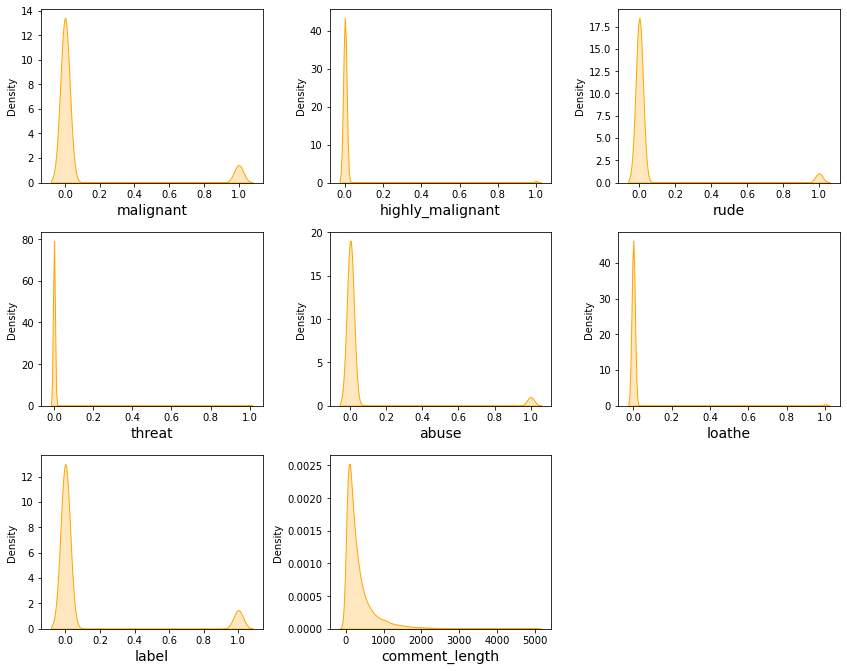

In [43]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in train_mc.drop(['comment_text'],axis=1):
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train_mc[column],color="orange",hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

# Text processing

In [44]:
# Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'wordcloud'

In [45]:
# Replacing '\n' in comment_text
train_mc['comment_text'] = train_mc['comment_text'].replace('\n',' ')

In [46]:
# Convert all comment texts to lower case in train dataset
train_mc['comment_text'] = train_mc['comment_text'].str.lower()
train_mc

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [47]:
# Replacing '\n' in comment_text
test_mc['comment_text'] = test_mc['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
test_mc['comment_text'] = test_mc['comment_text'].str.lower()
test_mc

,id,comment_text,comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,367
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,00017563c3f7919a,":if you have a look back at the source, the in...",205
4,00017695ad8997eb,i don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"one of the founding nations of the...",502


I have converted comments into lower case using the above coding in both train and test data.

Now I am going to clean the data by removing/replacing URLs, Numbers, punctuations, converting numbers to words etc.

We can also observe special characters at the top of the common letter or characters if we press a longtime while typing, for example, résumé. If we are not removing these types of noise from the text, then the model will consider resume and résumé; both are two different words. So, I am replacing them as well. Also, removing extra white spaces is also important. We can not get any information from extra spaces, so that we can ignore all additional spaces such as 0ne or more newlines, tabs, extra spaces.

# Cleaning the data in train dataset

In [48]:
# Replacing email addresses with "email"
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
train_mc["comment_text"]=train_mc["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'£|\$','dollers')

# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replacing numbers with 'numbr'
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Removing punctuation
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
train_mc["comment_text"] = train_mc["comment_text"].str.replace(r'^\s+|\s+?$', '')

# Cleaning the data in test dataset

In [50]:
# Replacing email addresses with "email"
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'£|\$','dollers')

# Replacing 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replacing numbers with 'numbr'
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Removing punctuation
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'\s+', ' ')

# Removing leading and trailing whitespace
test_mc["comment_text"] = test_mc["comment_text"].str.replace(r'^\s+|\s+?$', '')


# Removing stop words

In [52]:
# Creating a new column (clean_length) after removing punctuations, stopwords in train dataset
train_mc['clean_length'] = train_mc.comment_text.str.len()
train_mc

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,0,264,260
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,0,112,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,0,233,229
3,more i can t make any real suggestions on impr...,0,0,0,0,0,0,0,622,601
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,0,67,63
...,...,...,...,...,...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0,0,0,0,295,272
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,0,99,94
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0,0,81,73
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116,115


In [53]:
# Creating a new column (clean_length) after removing punctuations, stopwords in test dataset
test_mc['clean_length'] = test_mc.comment_text.str.len()
test_mc

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...,367,358
1,0000247867823ef7,from rfc the title is fine as it is imo,50,39
2,00013b17ad220c46,sources zawe ashton on lapland,54,30
3,00017563c3f7919a,if you have a look back at the source the info...,205,200
4,00017695ad8997eb,i don t anonymously edit articles at all,41,40
...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,60,55
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...,198,182
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...,423,365
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...,502,460


In [54]:
# Total length removal in train data
print('Original Length:',train_mc.comment_length.sum())
print('Clean Length:',train_mc.clean_length.sum())
print("Total Words Removed:", (train_mc.comment_length.sum()) - (train_mc.clean_length.sum()))

Original Length: 62893130
Clean Length: 60543209
Total Words Removed: 2349921


In [55]:
# Total length removal in test data
print('Original Length:',test_mc.comment_length.sum())
print('Clean Length:',test_mc.clean_length.sum())
print("Total Words Removed:", (test_mc.comment_length.sum()) - (test_mc.clean_length.sum()))

Original Length: 55885733
Clean Length: 52605432
Total Words Removed: 3280301


# WORDCLOUDS

In [63]:
pip install wordcloud

     |████████████████████████████████| 160 kB 848 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
import re
import matplotlib.pyplot as plt

In [65]:
from wordcloud import WordCloud

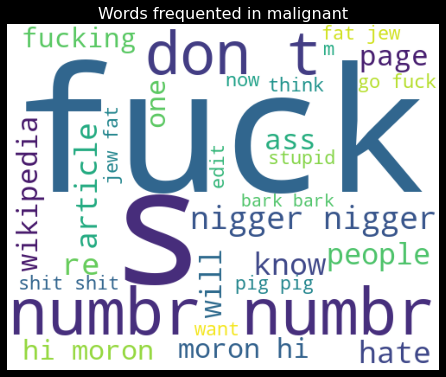

In [66]:
# Malignant Word Cloud
malignants = train_mc['comment_text'][train_mc['malignant']==1]

malignant_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in malignant",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

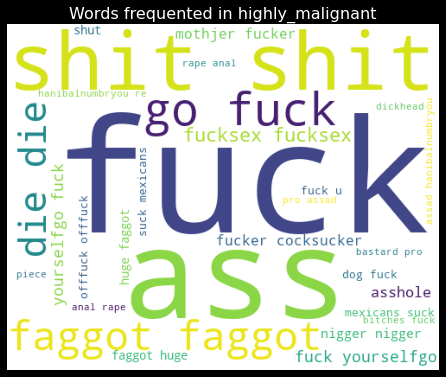

In [67]:
# Highly Malignant Word Cloud
highly_malignants = train_mc['comment_text'][train_mc['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=500,height=400,background_color='white',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

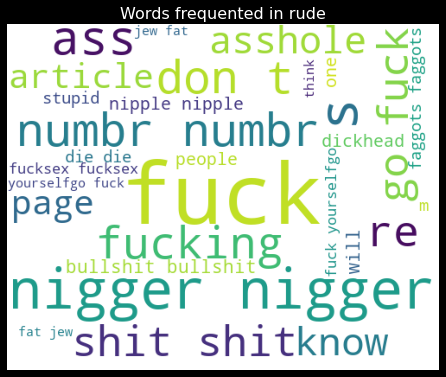

In [68]:
# Rude Word Cloud
rude_text = train_mc['comment_text'][train_mc['rude']==1]

rude_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

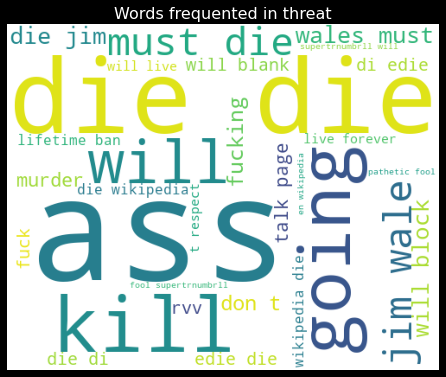

In [69]:
# Threat Word Cloud
threats = train_mc['comment_text'][train_mc['threat']==1]

threat_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

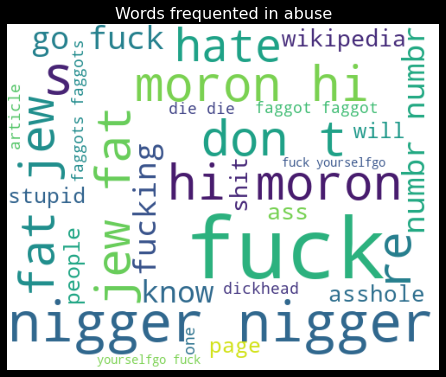

In [70]:
# Abuse Word Cloud
abuse_text = train_mc['comment_text'][train_mc['abuse']==1]

abuse_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

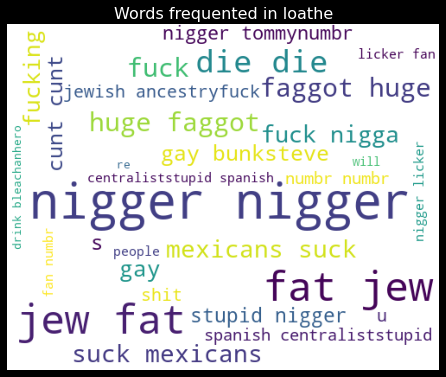

In [71]:
# Loathe Word Cloud
loathe_text = train_mc['comment_text'][train_mc['loathe']==1]

loathe_cloud = WordCloud(width=500,height=400,background_color='white',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(6,6),facecolor='k')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':16, 'color':'white'} )
plt.show()

# Correlation

In [72]:
# Checking the correlation between features and the target
train_mc.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054413,-0.055820
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175,0.008215
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.042910,-0.043581
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007917,-0.009327
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045027,-0.045614
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.013628,-0.013340
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051643,-0.052997
comment_length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,-0.051643,1.000000,0.998343
clean_length,-0.055820,0.008215,-0.043581,-0.009327,-0.045614,-0.013340,-0.052997,0.998343,1.000000


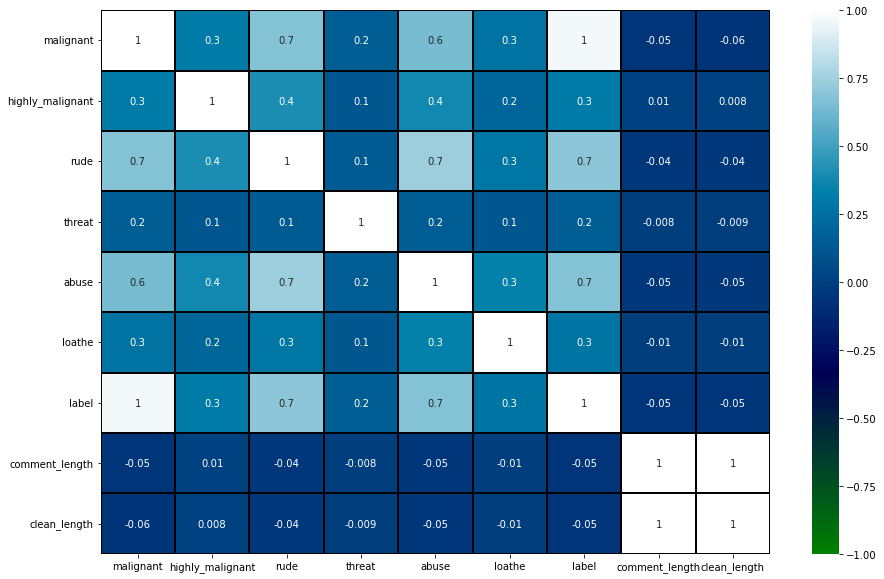

In [73]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(train_mc.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean",
            annot_kws={'size':10})
plt.yticks(rotation=0);

# Converting tokens into vectors

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [80]:
# Separating the input and output variables represented by x and y respectively in train data and converting them
x = tf_vec.fit_transform(train_mc['comment_text'])

y = train_mc['label']

# Checking shape of X and y
print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)

Shape of x:  (159571, 15000)
Shape of y:  (159571,)


In [81]:
# Doing the same process for test data 
x1 = tf_vec.fit_transform(test_mc['comment_text'])
x1.shape

(153164, 15000)

# Model Building

In [82]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify=y)

In [83]:
x_train.shape

(111699, 15000)

In [84]:
y_train.shape

(111699,)

In [85]:
x_test.shape

(47872, 15000)

In [86]:
y_test.shape

(47872,)

# Balancing the data

In [87]:
# Importing the Oversampling library and Counter
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [88]:
# We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


In [89]:
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss,log_loss

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(train_x,train_y)
pred_lg=lg.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_lg))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_lg))
print("Log loss : ",log_loss(y_test,pred_lg))     
print("Hamming loss: ",hamming_loss(y_test,pred_lg))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_lg))
print('Classification Report:\n ',classification_report(y_test,pred_lg))

Accuracy score:  0.9456467245989305
Roc_auc_score:  0.8934179710175056
Log loss :  1.877325089184168
Hamming loss:  0.05435327540106952
Confusion matrix: 
 [[41240  1764]
 [  838  4030]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.70      0.83      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.89      0.86     47872
weighted avg       0.95      0.95      0.95     47872



# Decision Tree Classifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
pred_dtc=dtc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_dtc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_dtc))
print("Log loss : ",log_loss(y_test,pred_dtc))     
print("Hamming loss: ",hamming_loss(y_test,pred_dtc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_dtc))
print('Classification Report:\n ',classification_report(y_test,pred_dtc))

Accuracy score:  0.9275985962566845
Roc_auc_score:  0.8349153012996746
Log loss :  2.5006909036801086
Hamming loss:  0.07240140374331551
Confusion matrix: 
 [[40908  2096]
 [ 1370  3498]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.95      0.96     43004
           1       0.63      0.72      0.67      4868

    accuracy                           0.93     47872
   macro avg       0.80      0.83      0.81     47872
weighted avg       0.93      0.93      0.93     47872



# Linear SVC

In [92]:
from sklearn.svm import LinearSVC

lsvc=LinearSVC()
lsvc.fit(train_x,train_y)
pred_lsvc=lsvc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_lsvc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_lsvc))
print("Log loss : ",log_loss(y_test,pred_lsvc))     
print("Hamming loss: ",hamming_loss(y_test,pred_lsvc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_lsvc))
print('Classification Report:\n ',classification_report(y_test,pred_lsvc))

Accuracy score:  0.9396306818181818
Roc_auc_score:  0.8854241225157476
Log loss :  2.085115804139157
Hamming loss:  0.060369318181818184
Confusion matrix: 
 [[41003  2001]
 [  889  3979]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.95      0.97     43004
           1       0.67      0.82      0.73      4868

    accuracy                           0.94     47872
   macro avg       0.82      0.89      0.85     47872
weighted avg       0.95      0.94      0.94     47872



# MultinomialNB Classifier

In [93]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(train_x,train_y)
pred_mnb=mnb.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_mnb))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_mnb))
print("Log loss : ",log_loss(y_test,pred_mnb))     
print("Hamming loss: ",hamming_loss(y_test,pred_mnb))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_mnb))
print('Classification Report:\n ',classification_report(y_test,pred_mnb))

Accuracy score:  0.9112007018716578
Roc_auc_score:  0.8861774395334381
Log loss :  3.0670782968762107
Hamming loss:  0.08879929812834225
Confusion matrix: 
 [[39460  3544]
 [  707  4161]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.92      0.95     43004
           1       0.54      0.85      0.66      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.89      0.81     47872
weighted avg       0.94      0.91      0.92     47872



# Ada Boost Classifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(train_x,train_y)
pred_abc=abc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_abc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_abc))
print("Log loss : ",log_loss(y_test,pred_abc))     
print("Hamming loss: ",hamming_loss(y_test,pred_abc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_abc))
print('Classification Report:\n ',classification_report(y_test,pred_abc))

Accuracy score:  0.9304603943850267
Roc_auc_score:  0.81118661297449
Log loss :  2.401840966367352
Hamming loss:  0.06953960561497326
Confusion matrix: 
 [[41323  1681]
 [ 1648  3220]]
Classification Report:
                precision    recall  f1-score   support

           0       0.96      0.96      0.96     43004
           1       0.66      0.66      0.66      4868

    accuracy                           0.93     47872
   macro avg       0.81      0.81      0.81     47872
weighted avg       0.93      0.93      0.93     47872



# XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(train_x,train_y)
pred_xgb=xgb.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_xgb))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_xgb))
print("Log loss : ",log_loss(y_test,pred_xgb))     
print("Hamming loss: ",hamming_loss(y_test,pred_xgb))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_xgb))
print('Classification Report:\n ',classification_report(y_test,pred_xgb))

Accuracy score:  0.9487383021390374
Roc_auc_score:  0.8503250390344151
Log loss :  1.7705350940136695
Hamming loss:  0.05126169786096257
Confusion matrix: 
 [[41880  1124]
 [ 1330  3538]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.76      0.73      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.86      0.85      0.86     47872
weighted avg       0.95      0.95      0.95     47872



In [96]:
from sklearn.ensemble import ExtraTreesClassifier

etc=ExtraTreesClassifier()
etc.fit(train_x,train_y)
pred_etc=etc.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred_etc))
print("Roc_auc_score: ",roc_auc_score(y_test,pred_etc))
print("Log loss : ",log_loss(y_test,pred_etc))     
print("Hamming loss: ",hamming_loss(y_test,pred_etc))
print('Confusion matrix: \n',confusion_matrix(y_test,pred_etc))
print('Classification Report:\n ',classification_report(y_test,pred_etc))

Accuracy score:  0.9544201203208557
Roc_auc_score:  0.8116796304973866
Log loss :  1.5742798365534176
Hamming loss:  0.04557987967914438
Confusion matrix: 
 [[42611   393]
 [ 1789  3079]]
Classification Report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98     43004
           1       0.89      0.63      0.74      4868

    accuracy                           0.95     47872
   macro avg       0.92      0.81      0.86     47872
weighted avg       0.95      0.95      0.95     47872



From the above Classifiecation Models, the highest accuracy score belongs to followed XGBoost Classifier and Logistic Regression Model.

Next, the Linear SVC Model followed by the AdaBooost Classifier and the Decision Tree Classifier.

Lastly the MultinomialNB Classifier Model.

# Cross Validation Score

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
scr_lg=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.9558441024494281


In [99]:
scr_dtc=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.9415933943419204


In [100]:
scr_lsvc=cross_val_score(lsvc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_lsvc.mean())

Cross validation score of this model is:  0.959547784553488


In [101]:
scr_mnb=cross_val_score(mnb,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_mnb.mean())

Cross validation score of this model is:  0.946982848930392


In [102]:
scr_abc=cross_val_score(abc,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_abc.mean())

Cross validation score of this model is:  0.9456981559137111


In [103]:
scr_xgb=cross_val_score(xgb,x,y,cv=5,scoring='accuracy')
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  0.9532559184423365


From the above Cross Validation Scores, the highest CV score belongs to LinearSVC model, Logistic Regression Model.

Next the XGBoost Classifier model , the MultinomialNB Classifier and the AdaBoost Classifier Model.

Lastly, the Decision Tree Classifier.

# Hyperparameter Tuning

Since the Accuracy Score and the cross validation score of the Logistic Regression Model are good, we shall consider this model for hyper parameter tuning.

We shall use GridSearchCV for hyper parameter tuning.

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameters={
    'C': [0.2,0.3,0.4],
    'penalty': ['l1', 'l2'],
    'solver':['newton-cg','lbfgs'],
    'multi_class':['auto','ovr']}
grid_lg = GridSearchCV(lg, param_grid = parameters, cv = 4, scoring='accuracy')

In [106]:
grid_lg.fit(train_x,train_y)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.2, 0.3, 0.4], 'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']},
             scoring='accuracy')

In [107]:
grid_lg.best_params_

{'C': 0.4, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}

In [108]:
Final_Model= LogisticRegression(C=0.4,penalty='l2',solver='newton-cg',multi_class='auto')

Final_Model.fit(train_x,train_y)
pred = Final_Model.predict(x_test)

print("Accuracy score: ",accuracy_score(y_test,pred))
print("Roc_auc_score: ",roc_auc_score(y_test,pred))
print("Log loss : ",log_loss(y_test,pred))     
print("Hamming loss: ",hamming_loss(y_test,pred))
print('Confusion matrix: \n',confusion_matrix(y_test,pred))
print('Classification Report:\n ',classification_report(y_test,pred))

Accuracy score:  0.9458973930481284
Roc_auc_score:  0.8910982043901516
Log loss :  1.8686666562580587
Hamming loss:  0.054102606951871655
Confusion matrix: 
 [[41279  1725]
 [  865  4003]]
Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.70      0.82      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.89      0.86     47872
weighted avg       0.95      0.95      0.95     47872



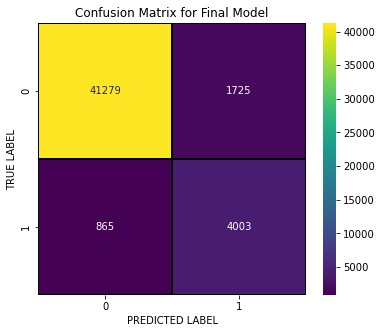

In [109]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="viridis",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

In [110]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_Model,"Malignant_Comments_Classifier.pkl")

['Malignant_Comments_Classifier.pkl']

In [111]:
# Loading the final model
model = joblib.load('Malignant_Comments_Classifier.pkl')

In [112]:
# Lets load the test data set
test_mc

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...,367,358
1,0000247867823ef7,from rfc the title is fine as it is imo,50,39
2,00013b17ad220c46,sources zawe ashton on lapland,54,30
3,00017563c3f7919a,if you have a look back at the source the info...,205,200
4,00017695ad8997eb,i don t anonymously edit articles at all,41,40
...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,60,55
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...,198,182
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...,423,365
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...,502,460


In [113]:
# Predicting the values for test data after loading trained model
Predictions = model.predict(x1)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
# Adding the predicted values to test dataframe
test_mc['Predicted_Values']=Predictions
test_mc

,id,comment_text,comment_length,clean_length,Predicted_Values
0,00001cee341fdb12,yo bitch ja rule is more succesful then you ll...,367,358,0
1,0000247867823ef7,from rfc the title is fine as it is imo,50,39,0
2,00013b17ad220c46,sources zawe ashton on lapland,54,30,0
3,00017563c3f7919a,if you have a look back at the source the info...,205,200,0
4,00017695ad8997eb,i don t anonymously edit articles at all,41,40,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but too ...,60,55,0
153160,fffd7a9a6eb32c16,throw from out field to home plate does it get...,198,182,0
153161,fffda9e8d6fafa9e,okinotorishima categories i see your changes a...,423,365,0
153162,fffe8f1340a79fc2,one of the founding nations of the eu germany ...,502,460,0


In [115]:
# Checking values counts for predicted values
test_mc.Predicted_Values.value_counts()

0    140773
1     12391
Name: Predicted_Values, dtype: int64

In [116]:
# Saving the data into csv file
test_mc.to_csv("Malignant_Comments_Classifier_Predicted_Test_Data.csv",index=False)